# Billboard EDA VII

##  Initial goal: use percentages to look at "country effect"

In [1]:
# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from datetime import datetime
from IPython.display import display
import statsmodels.api as sm


%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [3]:
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [4]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [5]:
# Renaming columns to Python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [6]:
#creating date/month/day/year columns

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [7]:
# Performer value counts

# These are the artists who had the most observations in the dataset.
# When showing to Mary, scroll down to show all the features 

# creating DF of performer value counts - this is just total appearances on chart, and does not consider chart position

performer_value_counts_df = billboard_df.performer.value_counts().to_frame().reset_index().rename(columns={"index": "performer", "performer": "total_weeks"}).sort_values(by=['performer'], ascending=True) 

In [8]:
# Calculating "Week-Points"- my way of considering chart position

billboard_df['week_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1)

In [9]:
performer_value_counts_df.head(200)

,performer,total_weeks
5127,"""Groove"" Holmes",14
5994,"""Little"" Jimmy Dickens",10
9002,"""Pookie"" Hudson",1
770,"""Weird Al"" Yankovic",91
351,'N Sync,172
3418,'N Sync & Gloria Estefan,20
3653,'N Sync Featuring Nelly,20
1321,'Til Tuesday,53
9068,(+44),1
6452,(The Preacher) Bobby Womack,9


In [10]:
billboard_df.head(200)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,26
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,48
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,58
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,64
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,74
5,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6,1990-03-17,3,17,1990,77
6,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7,1990-03-24,3,24,1990,89
7,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8,1990-03-31,3,31,1990,95
8,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9,1990-04-07,4,7,1990,95
9,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10,1990-04-14,4,14,1990,99


In [11]:
performer_summed_groupby = billboard_df.groupby('performer').sum().reset_index()

In [12]:
performer_summed_groupby.head()

,performer,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,week_points
0,"""Groove"" Holmes",1000,14,846.0,982,72,112,198,27524,414
1,"""Little"" Jimmy Dickens",422,10,375.0,377,55,110,168,19650,588
2,"""Pookie"" Hudson",96,1,0.0,96,1,5,25,1963,5
3,"""Weird Al"" Yankovic",5492,91,4462.0,3897,601,544,1458,181406,3699
4,'N Sync,5006,172,4478.0,3356,2004,1042,2577,343972,12366


In [13]:
performer_summed_groupby = performer_summed_groupby.drop(columns=['week_position', 'instance', 'prev_week_position', 'peak_position', 'year', 'weeks_on_chart', 'month', 'day'])

In [14]:
performer_summed_groupby.head()

,performer,week_points
0,"""Groove"" Holmes",414
1,"""Little"" Jimmy Dickens",588
2,"""Pookie"" Hudson",5
3,"""Weird Al"" Yankovic",3699
4,'N Sync,12366


In [15]:
performer_value_counts_df.head()

,performer,total_weeks
5127,"""Groove"" Holmes",14
5994,"""Little"" Jimmy Dickens",10
9002,"""Pookie"" Hudson",1
770,"""Weird Al"" Yankovic",91
351,'N Sync,172


In [16]:
newest_df = performer_summed_groupby.set_index('performer').join(performer_value_counts_df.set_index('performer'))

In [17]:
newest_df.head()

,week_points,total_weeks
performer,,
"""Groove"" Holmes",414,14
"""Little"" Jimmy Dickens",588,10
"""Pookie"" Hudson",5,1
"""Weird Al"" Yankovic",3699,91
'N Sync,12366,172


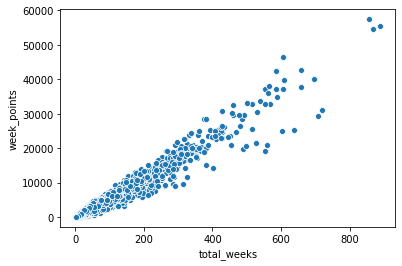

In [18]:
ax = sns.scatterplot(x="total_weeks", y = "week_points", data=newest_df)

In [19]:
newest_df['week_points_rank'] = newest_df['week_points'].rank(pct=True)
newest_df['total_weeks_rank'] = newest_df['total_weeks'].rank(pct=True)

In [20]:
newest_df.head()

,week_points,total_weeks,week_points_rank,total_weeks_rank
performer,,,,
"""Groove"" Holmes",414,14,0.435675,0.467863
"""Little"" Jimmy Dickens",588,10,0.502931,0.365383
"""Pookie"" Hudson",5,1,0.023291,0.030252
"""Weird Al"" Yankovic",3699,91,0.894274,0.918769
'N Sync,12366,172,0.977913,0.963205


In [21]:
newest_df['differential'] = newest_df.week_points_rank - newest_df.total_weeks_rank

In [22]:
newest_df.head()

,week_points,total_weeks,week_points_rank,total_weeks_rank,differential
performer,,,,,
"""Groove"" Holmes",414,14,0.435675,0.467863,-0.032189
"""Little"" Jimmy Dickens",588,10,0.502931,0.365383,0.137548
"""Pookie"" Hudson",5,1,0.023291,0.030252,-0.006961
"""Weird Al"" Yankovic",3699,91,0.894274,0.918769,-0.024495
'N Sync,12366,172,0.977913,0.963205,0.014707


In [23]:
newest_df = newest_df.sort_values(by=['performer']) 

In [24]:
newest_df.head(200)

,week_points,total_weeks,week_points_rank,total_weeks_rank,differential
performer,,,,,
"""Groove"" Holmes",414,14,0.435675,0.467863,-0.032189
"""Little"" Jimmy Dickens",588,10,0.502931,0.365383,0.137548
"""Pookie"" Hudson",5,1,0.023291,0.030252,-0.006961
"""Weird Al"" Yankovic",3699,91,0.894274,0.918769,-0.024495
'N Sync,12366,172,0.977913,0.963205,0.014707
'N Sync & Gloria Estefan,942,20,0.613106,0.615513,-0.002408
'N Sync Featuring Nelly,1559,20,0.749555,0.615513,0.134042
'Til Tuesday,2448,53,0.841359,0.861509,-0.020151
(+44),12,1,0.056003,0.030252,0.025751


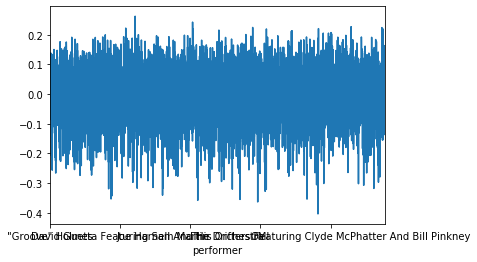

In [25]:
newest_df.differential.plot()

In [26]:
X = newest_df["week_points_rank"] ## X usually means our input variables (or independent variables)
y = newest_df["total_weeks_rank"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_weeks_rank   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.230e+05
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:11:14   Log-Likelihood:                 10884.
No. Observations:                9553   AIC:                        -2.176e+04
Df Residuals:                    9551   BIC:                        -2.175e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0186      0.002     11.739      0.000       0.015       0.022
week_points_rank     0.9628      0.003    350.739      0.000       0.957       0.968
==============================================================================
Omnibus:                      583.229   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              957.390
Skew:                           0.490   Prob(JB):                    1.27e-208
Kurtosis:                       4.202   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

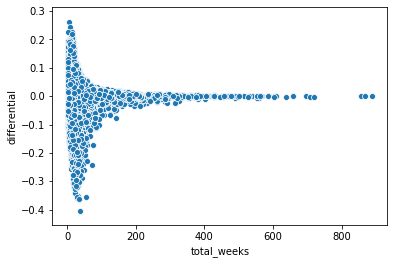

In [27]:
ax = sns.scatterplot(x="total_weeks", y = "differential", data=newest_df)

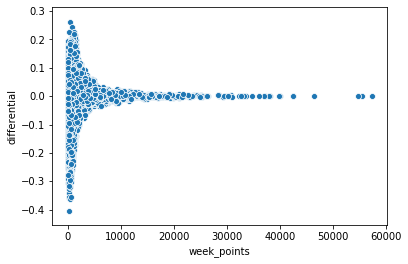

In [28]:
ax = sns.scatterplot(x="week_points", y = "differential", data=newest_df)

In [38]:
performer_min_year_groupby = billboard_df.groupby(['performer']).year.min().to_frame().reset_index()

In [39]:
performer_min_year_groupby.head()

,performer,year
0,"""Groove"" Holmes",1966
1,"""Little"" Jimmy Dickens",1965
2,"""Pookie"" Hudson",1963
3,"""Weird Al"" Yankovic",1983
4,'N Sync,1998


In [30]:
performer_min_year_groupby.head()

performer
"Groove" Holmes           1966
"Little" Jimmy Dickens    1965
"Pookie" Hudson           1963
"Weird Al" Yankovic       1983
'N Sync                   1998
Name: year, dtype: int64

In [41]:
newest_df = newest_df.reset_index()

In [42]:
yearly_df = newest_df.set_index('performer').join(performer_min_year_groupby.set_index('performer'))

In [43]:
yearly_df.head()

,week_points,total_weeks,week_points_rank,total_weeks_rank,differential,year
performer,,,,,,
"""Groove"" Holmes",414,14,0.435675,0.467863,-0.032189,1966
"""Little"" Jimmy Dickens",588,10,0.502931,0.365383,0.137548,1965
"""Pookie"" Hudson",5,1,0.023291,0.030252,-0.006961,1963
"""Weird Al"" Yankovic",3699,91,0.894274,0.918769,-0.024495,1983
'N Sync,12366,172,0.977913,0.963205,0.014707,1998


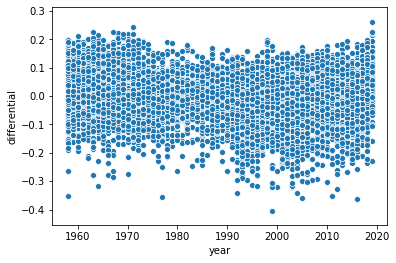

In [44]:
ax = sns.scatterplot(x="year", y = "differential", data=yearly_df)

In [45]:
X = yearly_df["year"] ## X usually means our input variables (or independent variables)
y = yearly_df["differential"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           differential   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     14.86
Date:                Sun, 15 Dec 2019   Prob (F-statistic):           0.000116
Time:                        05:14:58   Log-Likelihood:                 10800.
No. Observations:                9553   AIC:                        -2.160e+04
Df Residuals:                    9551   BIC:                        -2.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3198      0.083      3.855      0.000       0.157       0.482
year          -0.0002   4.17e-05     -3.855      0.000      -0.000   -7.91e-05
==============================================================================
Omnibus:                      601.763   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              952.914
Skew:                          -0.514   Prob(JB):                    1.19e-207
Kurtosis:                       4.157   Cond. No.                     2.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
yearly_df = yearly_df.sort_values(by=['total_weeks_rank'], ascending = False) 

In [54]:
yearly_df.head()

,week_points,total_weeks,week_points_rank,total_weeks_rank,differential,year
performer,,,,,,
Elton John,55477,889,0.999895,1.000000,-0.000105,1970
Taylor Swift,54648,869,0.999791,0.999895,-0.000105,2006
Madonna,57369,857,1.000000,0.999791,0.000209,1983
Tim McGraw,30914,719,0.997802,0.999686,-0.001884,1994
Kenny Chesney,29260,709,0.997069,0.999581,-0.002512,1998


In [67]:
stars_df = yearly_df.head(100)

In [68]:
stars_df.head(200)

,week_points,total_weeks,week_points_rank,total_weeks_rank,differential,year
performer,,,,,,
Elton John,55477,889,0.999895,1.000000,-0.000105,1970
Taylor Swift,54648,869,0.999791,0.999895,-0.000105,2006
Madonna,57369,857,1.000000,0.999791,0.000209,1983
Tim McGraw,30914,719,0.997802,0.999686,-0.001884,1994
Kenny Chesney,29260,709,0.997069,0.999581,-0.002512,1998
Drake,40004,697,0.999372,0.999477,-0.000105,2009
Stevie Wonder,42542,659,0.999581,0.999372,0.000209,1964
Rod Stewart,37860,657,0.999058,0.999267,-0.000209,1971
Keith Urban,25306,638,0.995813,0.999163,-0.003350,2000


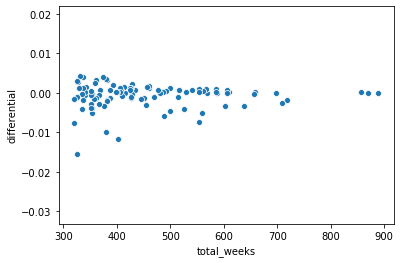

In [69]:
ax = sns.scatterplot(x="total_weeks", y = "differential", data=stars_df)

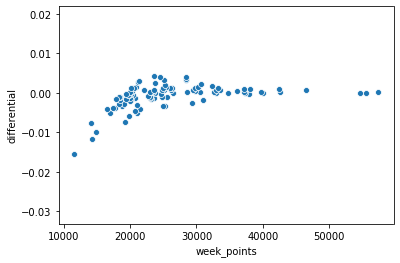

In [70]:
ax = sns.scatterplot(x="week_points", y = "differential", data=stars_df)

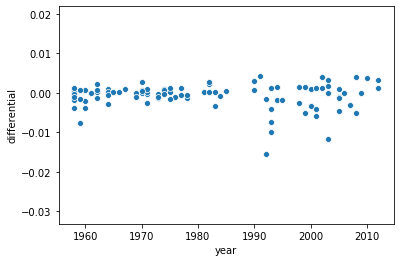

In [71]:
ax = sns.scatterplot(x= "year", y = "differential", data=stars_df)

In [72]:
X = stars_df["year"] ## X usually means our input variables (or independent variables)
y = stars_df["differential"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           differential   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4808
Date:                Sun, 15 Dec 2019   Prob (F-statistic):              0.490
Time:                        05:23:35   Log-Likelihood:                 436.34
No. Observations:                 100   AIC:                            -868.7
Df Residuals:                      98   BIC:                            -863.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0243      0.036      0.673      0.503      -0.047       0.096
year       -1.264e-05   1.82e-05     -0.693      0.490   -4.88e-05    2.35e-05
==============================================================================
Omnibus:                       52.000   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.404
Skew:                          -1.798   Prob(JB):                     4.95e-39
Kurtosis:                       8.422   Cond. No.                     2.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# from this analysis, it looks like there isn't a real effect by artist. the next step would be to recreate this by looking at songs.